## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [11]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [20]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,164


In [21]:
df.tail()

,DATE,TAG,POSTS
2281,2022-04-01 00:00:00,php,3918
2282,2022-04-01 00:00:00,python,23968
2283,2022-04-01 00:00:00,r,4814
2284,2022-04-01 00:00:00,ruby,496
2285,2022-04-01 00:00:00,swift,1830


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [13]:
df.shape

(2286, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [14]:
df.count()

DATE     2286
TAG      2286
POSTS    2286
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [32]:
tags_df = df.groupby('TAG').sum()  # number of posts for a programming language since stackoverflow was created
tags_df

,POSTS
TAG,
assembly,40115
c,378039
c#,1533052
c++,761504
delphi,49481
go,60942
java,1838572
javascript,2362112
perl,66632


In [39]:
# Programming language with most posts:

# since you cannot access the "TAG" column in a grouped df, we access the data at the index where the max number of posts is using .loc to get around this
tags_df.loc[tags_df['POSTS'].idxmax()]

POSTS    2362112
Name: javascript, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [40]:
date_df = df.groupby('TAG').count()  # number of months of data that exist for each language
date_df

,DATE,POSTS
TAG,,
assembly,165,165
c,165,165
c#,166,166
c++,165,165
delphi,165,165
go,150,150
java,165,165
javascript,165,165
perl,165,165


In [41]:
# Programming language with fewest months of entries:

# same concept as above
date_df.loc[date_df['DATE'].idxmin()]

DATE     150
POSTS    150
Name: go, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [43]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [44]:
df.DATE[1] # both are valid ways of accessing columns

'2008-08-01 00:00:00'

In [45]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,164


## Data Manipulation



In [48]:
# pivot our dataframe to have programming languages as the columns, the date as the rows, and the values as the number of posts
# and then remove all NaN values since not all programming languages may have gotten posts every month, we can replace these with 0

reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS').fillna(value=0)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,164.0,14.0,0.0,222.0,164.0,28.0,160.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1648.0,754.0,105.0,0.0,1135.0,638.0,130.0,480.0,537.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1152.0,725.0,127.0,614.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,580.0,97.0,502.0,452.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,284.0,2260.0,5709.0,3862.0,159.0,771.0,7523.0,15257.0,103.0,3721.0,22018.0,3916.0,433.0,1661.0
2022-01-01,240.0,2062.0,5913.0,3888.0,151.0,794.0,7702.0,16263.0,131.0,4007.0,22624.0,4250.0,477.0,1988.0
2022-02-01,226.0,1791.0,5843.0,3487.0,187.0,689.0,7291.0,15476.0,97.0,3729.0,22684.0,4345.0,457.0,1886.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [51]:
reshaped_df.shape

(166, 14)

In [54]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [53]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,164.0,14.0,0.0,222.0,164.0,28.0,160.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1648.0,754.0,105.0,0.0,1135.0,638.0,130.0,480.0,537.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1152.0,725.0,127.0,614.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,580.0,97.0,502.0,452.0,1.0,159.0,0.0




**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [56]:
# the number of entries would be different if we left in the NaN values, but since we replaced it with 0, every single programming language should have the same number of entries

reshaped_df.count()

TAG
assembly      166
c             166
c#            166
c++           166
delphi        166
go            166
java          166
javascript    166
perl          166
php           166
python        166
r             166
ruby          166
swift         166
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

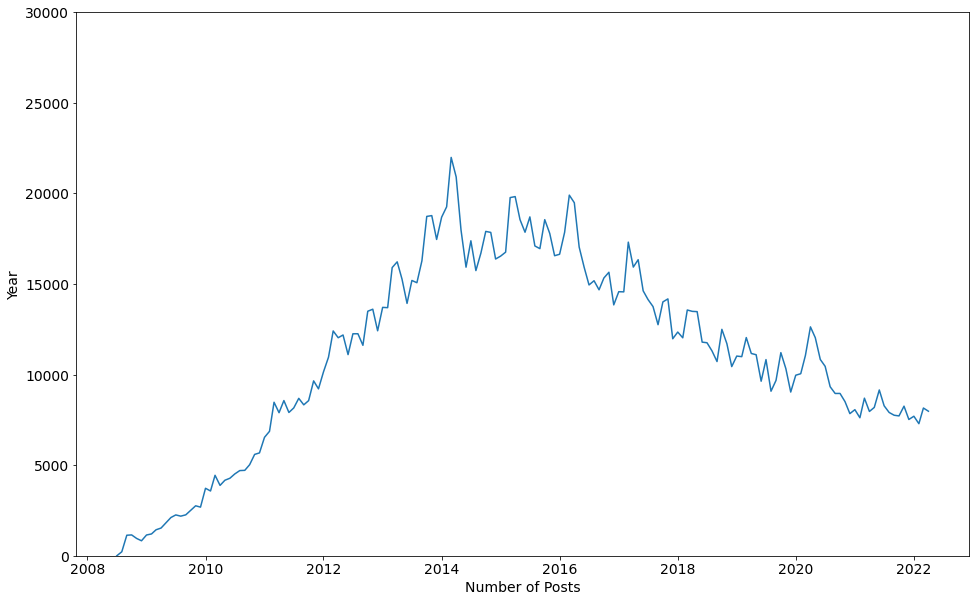

In [80]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of Posts", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.ylim(0, 30000)

plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

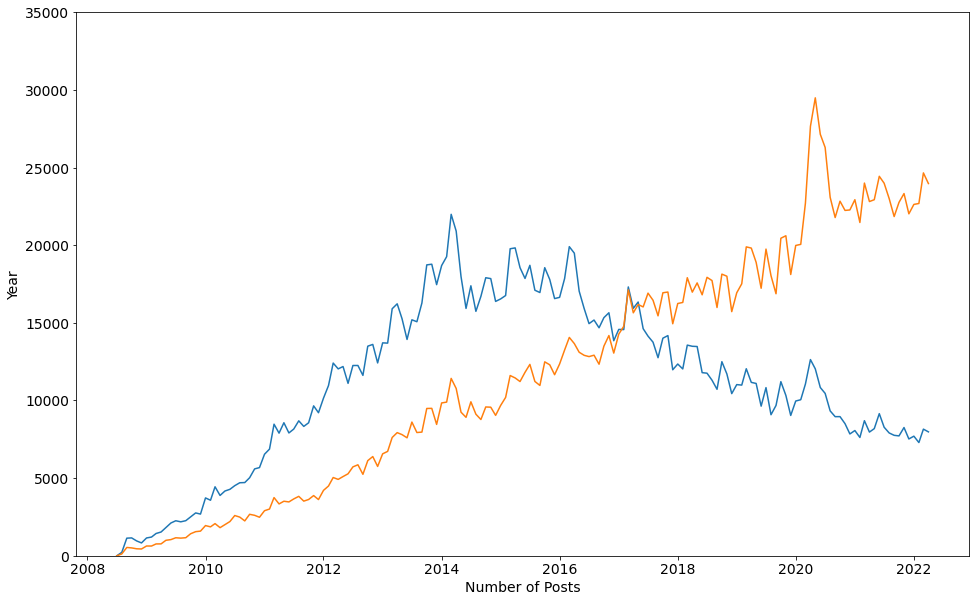

In [78]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of Posts", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

**Challenge:** Show all the programming languages on one chart

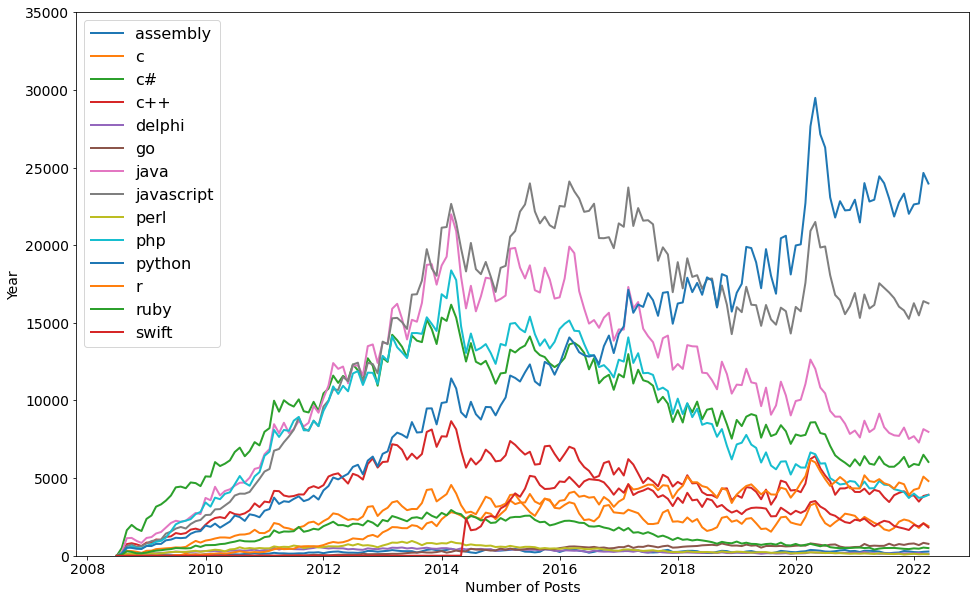

In [77]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of Posts", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=2, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [89]:
# The window is number of observations that are averaged
# The larger the window the smoother the graph becomes, with less peaks... or it should since more data is getting averaged

# the purpose of this is to identify trends and make a graph more visually understandable when exact data is not required

roll_df = reshaped_df.rolling(window=6).mean()

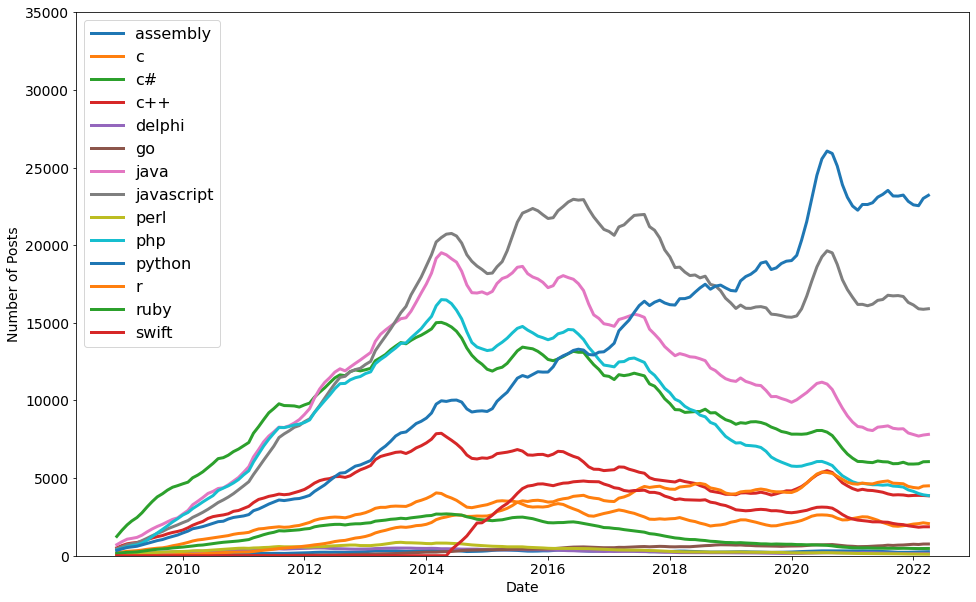

In [90]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)